# A Deep Learning Approach for Multiclass Emotion Detection from Facial Expressions using CNN(Convolutional Neural Network)

In [1]:
import os
import warnings
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')
logging.getLogger('tensorflow').setLevel(logging.ERROR)

## Remove the corrupt images 

In [2]:
import cv2
import imghdr

data_dir = 'test'

image_exts = ['jpeg', 'jpg', 'png', 'bmp']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image test\sad\.ipynb_checkpoints


## Training data (with validation split)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 )

train_data = train_gen.flow_from_directory(
    'test',
    target_size=(128, 128),
    batch_size= 32,
    class_mode='sparse',  
    subset='training'  )

val_data = train_gen.flow_from_directory(
    'test',
    target_size=(128, 128),
    batch_size= 32,
    class_mode='sparse',
    subset='validation'  )

test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    'test',
    target_size=(128, 128),
    batch_size= 32,
    class_mode='sparse',
    shuffle=False  
)


Found 5746 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
print(train_data.class_indices)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


## Defining the CNN model

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3), name='input_layer'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')  # 7 classes
])


## Compile the model

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Fit the model

In [37]:
hist = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 62s 342ms/step - accuracy: 0.9604 - loss: 0.1224 - val_accuracy: 0.4071 - val_loss: 4.0208
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 62s 342ms/step - accuracy: 0.9595 - loss: 0.1184 - val_accuracy: 0.3764 - val_loss: 4.3879
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 62s 342ms/step - accuracy: 0.9581 - loss: 0.1226 - val_accuracy: 0.4043 - val_loss: 4.0699
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 62s 343ms/step - accuracy: 0.9684 - loss: 0.1108 - val_accuracy: 0.3848 - val_loss: 4.0626
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 62s 347ms/step - accuracy: 0.9658 - loss: 0.0969 - val_accuracy: 0.3757 - val_loss: 4.4156
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 81s 340ms/step - accuracy: 0.9682 - loss: 0.0945 - val_accuracy: 0.3918 - val_loss: 4.2936
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 82s 340ms/step - accuracy: 0.9666 - loss: 0.0964 - val_accuracy: 0.4008 - val_loss: 4.6498
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 82s 342ms/step - accuracy: 0.9704 - loss: 0

In [38]:
model.evaluate(test_data)

225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.8138 - loss: 1.6248


[0.9612327218055725, 0.8785176873207092]

## Prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


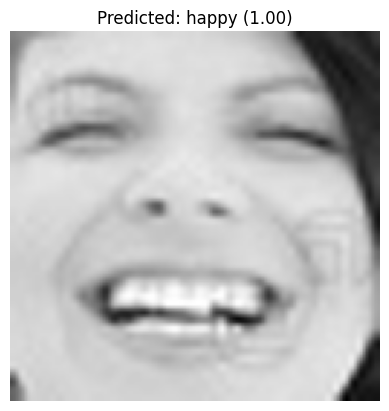

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img_path = "train\happy\Training_169588.jpg" 
image_size = (128, 128)

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def predict_emotion(img_path, model, class_names, image_size):
    img = Image.open(img_path).convert("RGB").resize(image_size)  
    img_array = np.array(img)

    # Normalize and expand dims
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

# Predict
    pred = model.predict(img_array)
    predicted_index = np.argmax(pred)
    predicted_label = class_names[predicted_index]
    confidence = np.max(pred)

    # Show result
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f})")
    plt.show()

    return predicted_label, confidence

# Predict and Show
predicted_label, confidence = predict_emotion(img_path, model, class_names, image_size)
#print(f"Prediction → {predicted_label} | Confidence: {confidence:.2f}")

## Save the model

In [10]:
'''from tensorflow.keras.models import load_model

model.save('CNN_model.keras')  # or use a folder like 'my_model/' for SavedModel format

# Load the saved model
# model = load_model('my_model.h5')'''

"from tensorflow.keras.models import load_model\n\nmodel.save('CNN_model.keras')  # or use a folder like 'my_model/' for SavedModel format\n\n# Load the saved model\n# model = load_model('my_model.h5')"

## Plot Training & Validation Accuracy 

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


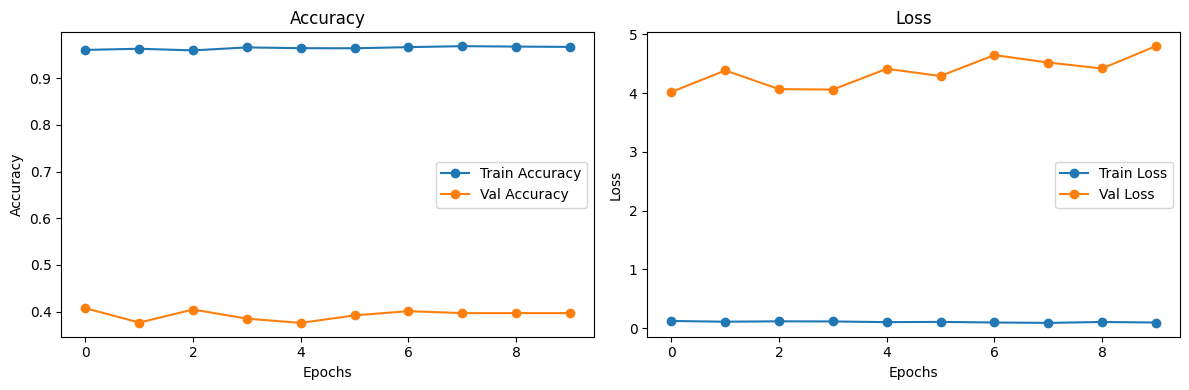

In [40]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(hist.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# === Plot Training & Validation Loss ===
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss', marker='o')
plt.plot(hist.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Print classification report

In [41]:
# Get true labels
true_labels = test_data.classes

# Predict on test data
pred_probs = model.predict(test_data)
pred_labels = np.argmax(pred_probs, axis=1)

# === Classification Report ===
print("\nClassification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_names))


225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step

Classification Report:

              precision    recall  f1-score   support

       angry       0.90      0.85      0.87       958
     disgust       1.00      0.81      0.90       111
        fear       0.89      0.83      0.86      1024
       happy       0.90      0.91      0.90      1774
     neutral       0.87      0.89      0.88      1233
         sad       0.83      0.87      0.85      1247
    surprise       0.89      0.91      0.90       831

    accuracy                           0.88      7178
   macro avg       0.90      0.87      0.88      7178
weighted avg       0.88      0.88      0.88      7178



## Plot metrics

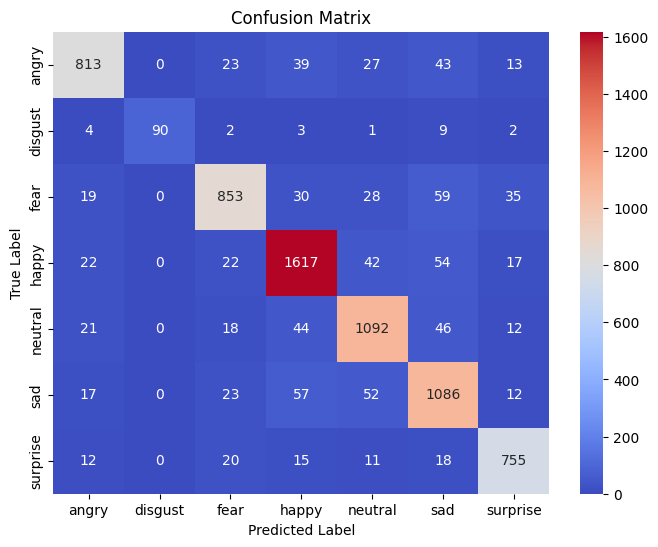

In [49]:

# === Confusion Matrix ===
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()